## Fashion MNIST dataset classification by CNN model

### Data Description

* Each image is of dimensions 28 * 28 pixels, for a total of 784 pixels
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 
* The training and test data sets have 785 columns. 

#### Labels
Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top 
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 


In [1]:
# from subprocess import check_output
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import warnings
warnings.filterwarnings('ignore')
num_classes = 10
epochs = 20

**Create dataframes for train and test datasets**

In [2]:
train_df = pd.read_csv('C:/Users/hp/Documents/ML/jupyter notebook/Datasets/fashion-mnist_train.csv')
test_df = pd.read_csv('C:/Users/hp/Documents/ML/jupyter notebook/Datasets/fashion-mnist_test.csv')

Now it is observed that the first column is the label data and because it has 10 classes so it is going to have from 0 to 9.The remaining columns are the actual pixel data from 0 to 255.
Here each row is a different image representation in the form pixel data.

Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.

To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras.

In [3]:
train_data = np.array(train_df, dtype = 'float32')

In [4]:
train_data.shape

(60000, 785)

In [5]:
test_data = np.array(test_df, dtype='float32')

## Rescaling features by normalizing values btw 0-1

In [6]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

Now we are gonna split the training data into validation and actual training data for training the model and testing it using the validation set. This is achieved using the train_test_split method of scikit learn library.

In [7]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Now let us visualise the some samples after the resize of the data which needs to be ready for train the network .


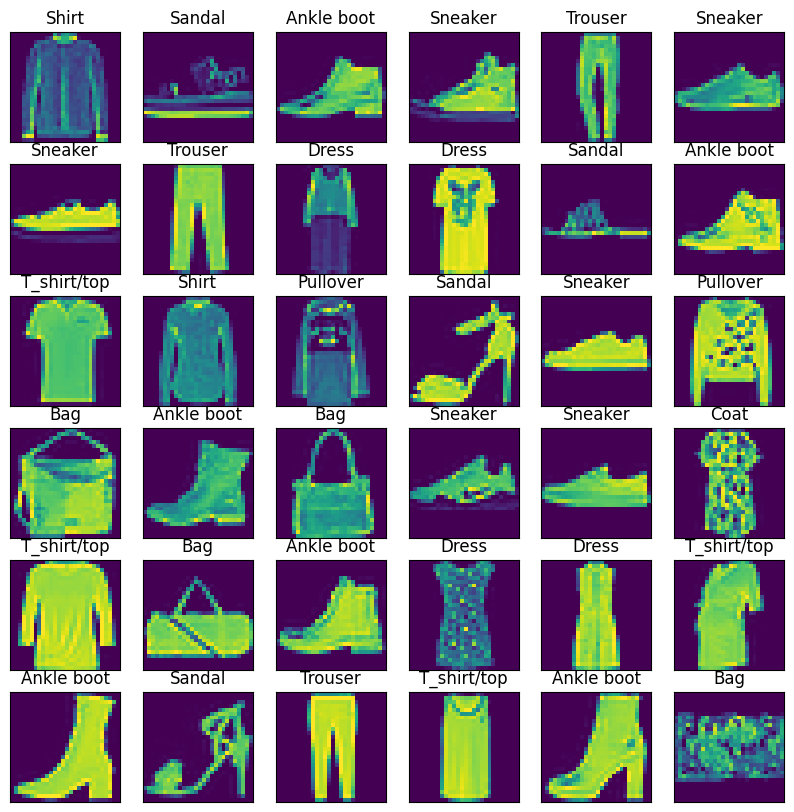

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']             #classes/labels
plt.figure(figsize=(10, 10))                                                  #Top level container for subplots
for i in range(36):                                                           #To visualize frst 36 samples of training data
    plt.subplot(6, 6, i + 1)                                                  #Divide figure into (nrows,ncolm,index of grid where subplot will show)
    plt.xticks([])                                                            #Remove x , y axis ticks
    plt.yticks([])
    plt.grid(False)                                                           #Remove grid lines to clean up the plot
    plt.imshow(x_train[i].reshape((28,28)))                                   #Show  array of x.train[i] to 2d array (pic)
    label_index = int(y_train[i])                                             #Take label of that sample
    plt.title(class_names[label_index])                                       #Show corresponding class
plt.show()                                                                    #show all subplots

### Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

In [9]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1) 

## Converted frm 3d to 2d 

In [10]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [11]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,                                                # down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),                                                               #Regulariation
    Flatten(),                                                                # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [12]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])
                       # 'sparse_categorical_crossentropy' is used when target labels are not one hot encoded

In [13]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=5000,
    epochs=7,
    verbose=1,                                #for display, verbose =0 no show epochs,verbose=1 default,progress bar for every epoch with loss & metrics
    validation_data=(x_validate,y_validate),
)

Epoch 1/7
10/10 [==============================] - 29s 2s/step - loss: 1.8361 - accuracy: 0.3833 - val_loss: 1.2589 - val_accuracy: 0.6331
Epoch 2/7
10/10 [==============================] - 20s 2s/step - loss: 0.9969 - accuracy: 0.7044 - val_loss: 0.7523 - val_accuracy: 0.7605
Epoch 3/7
10/10 [==============================] - 21s 2s/step - loss: 0.6841 - accuracy: 0.7711 - val_loss: 0.6019 - val_accuracy: 0.7883
Epoch 4/7
10/10 [==============================] - 20s 2s/step - loss: 0.5820 - accuracy: 0.7974 - val_loss: 0.5394 - val_accuracy: 0.8088
Epoch 5/7
10/10 [==============================] - 21s 2s/step - loss: 0.5241 - accuracy: 0.8164 - val_loss: 0.4883 - val_accuracy: 0.8285
Epoch 6/7
10/10 [==============================] - 22s 2s/step - loss: 0.4823 - accuracy: 0.8317 - val_loss: 0.4602 - val_accuracy: 0.8383
Epoch 7/7
10/10 [==============================] - 22s 2s/step - loss: 0.4561 - accuracy: 0.8414 - val_loss: 0.4388 - val_accuracy: 0.8465


Let us plot the Training Accuracy vs Loss to get a better understanding of the model training.

Text(0.5, 1.0, 'Train - Accuracy')

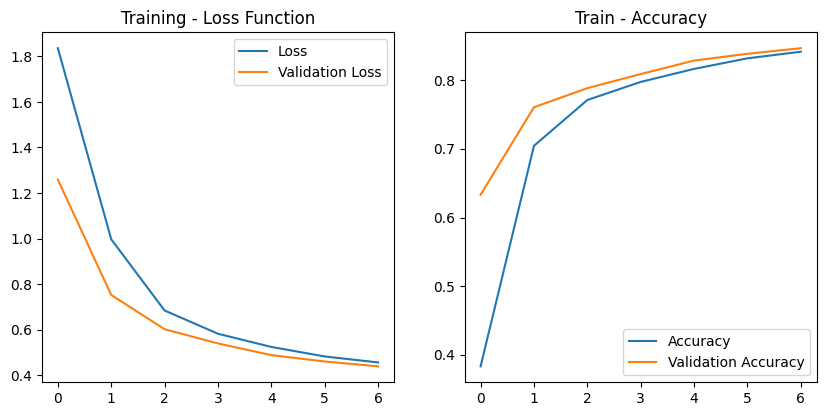

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()                                                               #Table of contents
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

- #### Evaluate /Score the model

In [15]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.4334
Test Accuracy : 0.8525


### Results



### Classification Report
We can summarize the performance of our classifier as follows

In [16]:
#Get the predictions for the test data
predicted_classes = np.argmax(cnn_model.predict(x_test), axis=-1)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true[0])
incorrect = np.nonzero(predicted_classes!=y_true[0])
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.76      0.86      0.81      1000
     Class 1       0.97      0.96      0.97      1000
     Class 2       0.81      0.73      0.76      1000
     Class 3       0.88      0.88      0.88      1000
     Class 4       0.70      0.88      0.78      1000
     Class 5       0.93      0.93      0.93      1000
     Class 6       0.73      0.51      0.60      1000
     Class 7       0.90      0.88      0.89      1000
     Class 8       0.95      0.95      0.95      1000
     Class 9       0.91      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



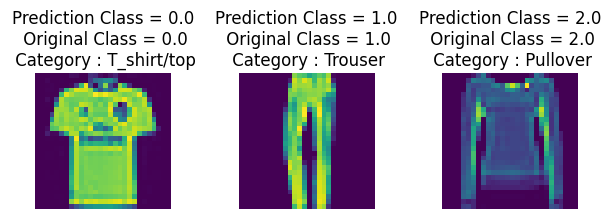

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (7,7))
axes = axes.ravel()

for i in np.arange(0, 3):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}\n Category : {class_names[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)